In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../input/train_folds.csv")
df.head(3)

,id,target,file_path,fold
0,00000e74ad,1,input/train/0/0/0/00000e74ad.npy,2
1,00001f4945,0,input/train/0/0/0/00001f4945.npy,1
2,0000661522,0,input/train/0/0/0/0000661522.npy,3


In [3]:
import torch

In [4]:
states_1d = [torch.load(f"../final_models/b7_1d/tf_efficientnet_b7_ns_fold{fold}_best_score.pth") for fold in range(5)]

In [5]:
states_3d = [torch.load(f"../final_models/b7_3d/tf_efficientnet_b7_ns_fold{fold}_best_score.pth") for fold in range(5)]

In [129]:
states_low[0]['preds'].flatten()

array([0.289 , 0.3896, 0.4165, ..., 0.2976, 0.5166, 0.2952], dtype=float16)

In [138]:
oof_df = pd.DataFrame()
for fold in range(5):
    preds_1d = states_1d[fold]['preds'].flatten()
    preds_3d = states_3d[fold]['preds'].flatten()
    _df = df[df['fold'] == fold].reset_index(drop=True)
    _df['preds_1d'] = preds_1d
    _df['preds_3d'] = preds_3d
    oof_df = pd.concat([oof_df, _df])

In [139]:
oof_df

,id,target,file_path,fold,preds_1d,preds_3d
0,00010beb4a,1,input/train/0/0/0/00010beb4a.npy,0,0.376221,0.378174
1,00014b7a9d,1,input/train/0/0/0/00014b7a9d.npy,0,0.204834,0.196777
2,0001c76f56,1,input/train/0/0/0/0001c76f56.npy,0,0.745117,0.497070
3,0002b883f5,0,input/train/0/0/0/0002b883f5.npy,0,0.191895,0.239746
4,00034d8429,0,input/train/0/0/0/00034d8429.npy,0,0.217163,0.168335
...,...,...,...,...,...,...
111995,fffde18882,0,input/train/f/f/f/fffde18882.npy,4,0.240601,0.279053
111996,fffdf87619,1,input/train/f/f/f/fffdf87619.npy,4,1.000000,1.000000
111997,fffe81f2ec,0,input/train/f/f/f/fffe81f2ec.npy,4,0.166382,0.161011
111998,ffff1a0fee,1,input/train/f/f/f/ffff1a0fee.npy,4,0.824707,0.999023


In [140]:
from sklearn.metrics import roc_auc_score

In [141]:
roc_auc_score(oof_df[oof_df['fold'] == 0].target.values, oof_df[oof_df['fold'] == 0].preds_3d.values), roc_auc_score(oof_df.target.values, oof_df.preds_3d.values)

(0.8737153938929264, 0.8742437809858996)

In [142]:
oof_df[oof_df['target'] == 1].sort_values("preds_3d")

,id,target,file_path,fold,preds_1d,preds_3d
135,004b9631f5,1,input/train/0/0/4/004b9631f5.npy,4,0.067688,0.058350
22978,3423e21d54,1,input/train/3/4/2/3423e21d54.npy,0,0.058899,0.058655
9528,15beb25a3b,1,input/train/1/5/b/15beb25a3b.npy,0,0.070068,0.058990
106728,f4129980e2,1,input/train/f/4/1/f4129980e2.npy,0,0.049774,0.059875
51872,76754f261f,1,input/train/7/6/7/76754f261f.npy,2,0.079651,0.061523
...,...,...,...,...,...,...
79968,b6c8c7bfe4,1,input/train/b/6/c/b6c8c7bfe4.npy,3,1.000000,1.000000
102414,ea34ea74dd,1,input/train/e/a/3/ea34ea74dd.npy,1,1.000000,1.000000
102415,ea35025664,1,input/train/e/a/3/ea35025664.npy,1,1.000000,1.000000
102367,ea1c27041f,1,input/train/e/a/1/ea1c27041f.npy,1,1.000000,1.000000


<AxesSubplot:>

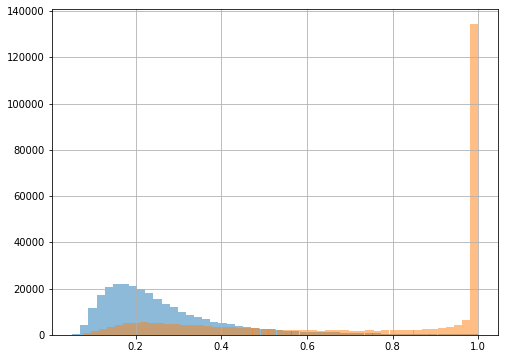

In [145]:
# oof_df.preds_1d.hist(bins=50, alpha=0.5)
oof_df[oof_df['target'] == 0].preds_3d.hist(bins=50, alpha=0.5)
oof_df[oof_df['target'] == 1].preds_3d.hist(bins=50, alpha=0.5)

In [148]:
oof_df[(oof_df['target'] == 1) & (oof_df['preds_3d'] < 0.2)].sort_values('preds_3d')

,id,target,file_path,fold,preds_1d,preds_3d
135,004b9631f5,1,input/train/0/0/4/004b9631f5.npy,4,0.067688,0.058350
22978,3423e21d54,1,input/train/3/4/2/3423e21d54.npy,0,0.058899,0.058655
9528,15beb25a3b,1,input/train/1/5/b/15beb25a3b.npy,0,0.070068,0.058990
106728,f4129980e2,1,input/train/f/4/1/f4129980e2.npy,0,0.049774,0.059875
51872,76754f261f,1,input/train/7/6/7/76754f261f.npy,2,0.079651,0.061523
...,...,...,...,...,...,...
29640,43ebb54978,1,input/train/4/3/e/43ebb54978.npy,1,0.255371,0.199829
102359,ea150861bd,1,input/train/e/a/1/ea150861bd.npy,1,0.295654,0.199829
57973,852e0bd970,1,input/train/8/5/2/852e0bd970.npy,1,0.173096,0.199829
84616,c13b08e0bc,1,input/train/c/1/3/c13b08e0bc.npy,4,0.159180,0.199829


In [12]:
from nnAudio.Spectrogram import CQT1992v2

In [13]:
import pandas as pd
import numpy as np
import umap
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
plt.rcParams["figure.figsize"] = (8,6)

In [154]:
wave_transform = CQT1992v2(sr=2048, fmin=20, fmax=512, hop_length=16)

CQT kernels created, time used = 0.0138 seconds


/home/hamsh/anaconda3/envs/rapids-v4/lib/python3.8/site-packages/nnAudio/utils.py:326: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn('If fmax is given, n_bins will be ignored',SyntaxWarning)


In [155]:
s = np.load("../input/train/0/0/4/004b9631f5.npy")

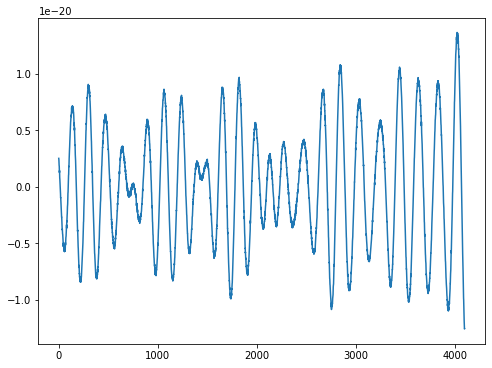

In [159]:
plt.plot(s[0])

In [161]:
s[0].mean(), s[0].std(), s[0].min(), s[0].max()

(1.8853099855030182e-23,
 5.354202213954355e-21,
 -1.2573128101461514e-20,
 1.3641913821790187e-20)

In [157]:
tfm_0 = wave_transform(torch.from_numpy(s[0]).float())
tfm_1 = wave_transform(torch.from_numpy(s[1]).float())
tfm_2 = wave_transform(torch.from_numpy(s[2]).float())

tfm = np.vstack([tfm_0, tfm_1, tfm_2])

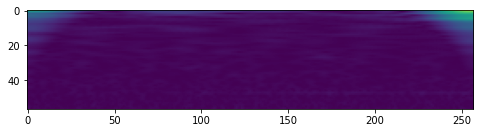

In [158]:
f = tfm[0]

# f = albumentations.CoarseDropout(p=1)(image=torch.from_numpy(f).float())

plt.imshow(f)

In [120]:
f.shape

(30, 513)

In [134]:
A = oof_df.preds_low.values
B = oof_df.preds_3d.values
targets = oof_df.target.values
for i in range(1, 50):
    a = i*0.01
    b = 1 - a
    #0.8753788865670478
    y_hat = a*(A) + b*(B)
    score = roc_auc_score(targets, y_hat)

    print(i*0.01, score)

0.01 0.8737326995381407
0.02 0.8737391475615028
0.03 0.8737380729440888
0.04 0.8737293655136975
0.05 0.8737144806275632
0.06 0.8736924865254233
0.07 0.8736639532009358
0.08 0.8736291564831999
0.09 0.8735855743695067
0.1 0.8735364908205205
0.11 0.8734808953132193
0.12 0.8734160759533007
0.13 0.8733459013634556
0.14 0.8732683555996805
0.15 0.8731829740573542
0.16 0.8730904164941715
0.17 0.8729904746830781
0.18 0.8728821762069217
0.19 0.8727679443758027
0.2 0.8726438373846276
0.21 0.8725127890664881
0.22 0.8723726846253337
0.23 0.8722263864656797
0.24 0.872068461392034
0.25 0.871904178856256
0.26 0.8717321265495844
0.27 0.8715501606581095
0.28 0.871360188548022
0.29 0.8711587379614517
0.3 0.8709516202826906
0.31 0.8707333331198129
0.32 0.8705069188837232
0.33 0.8702687669236857
0.34 0.8700236482859168
0.35000000000000003 0.8697630707823858
0.36 0.869495340376622
0.37 0.8692143527952847
0.38 0.8689334090596136
0.39 0.8686307838812607
0.4 0.868323255003622
0.41000000000000003 0.867995222298

In [110]:
wave_transform = CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=32)

CQT kernels created, time used = 0.0283 seconds


In [137]:
import albumentations

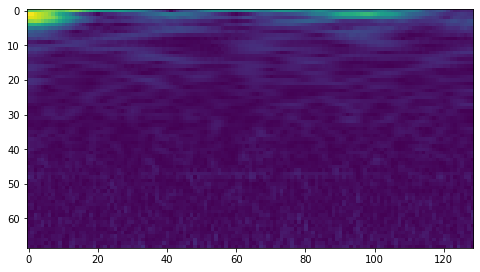

In [138]:
f = tfm[0]

# f = albumentations.CoarseDropout(p=1)(image=torch.from_numpy(f).float())

plt.imshow(f)

In [139]:
f = tfm[0]
f

array([[0.06524974, 0.06549878, 0.06606296, ..., 0.00993049, 0.0092172 ,
        0.00887914],
       [0.086707  , 0.08539548, 0.08221415, ..., 0.01378825, 0.01286102,
        0.01233753],
       [0.08285854, 0.08231926, 0.08117812, ..., 0.01307679, 0.01368399,
        0.0139492 ],
       ...,
       [0.00253807, 0.00273272, 0.00235364, ..., 0.00266861, 0.00378807,
        0.00405081],
       [0.0032512 , 0.00327437, 0.00210702, ..., 0.00361466, 0.00487405,
        0.00196566],
       [0.00455108, 0.00161456, 0.00307376, ..., 0.0037418 , 0.00583993,
        0.00013643]], dtype=float32)

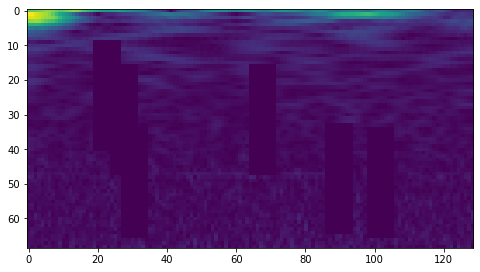

In [140]:
f = tfm[0]

f = albumentations.CoarseDropout(p=1, min_holes=5, max_height=32, max_width=8)(image=f)


plt.imshow(f['image'])

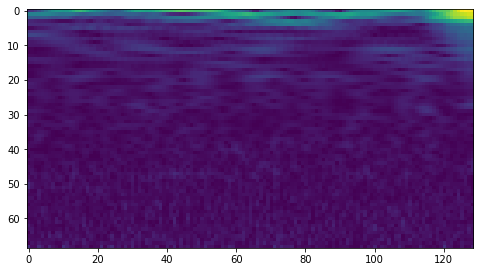

In [127]:
plt.imshow(tfm[1])

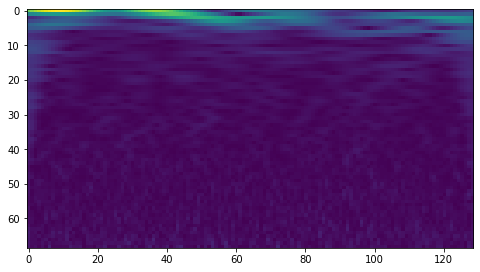

In [108]:
plt.imshow(tfm[2])

In [2]:
import timm

In [3]:
timm.list_models(pretrained=True)

['adv_inception_v3',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn